# KNN based classifier (Q1)

Importing required libraries, pandas to read csv file, numpy for ndarray and mean_squared_error, r2_score, to analyze performance of the model.

In [12]:
import pandas as pd
import numpy as np
from scipy.spatial import distance
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from collections import Counter
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

# Reading data from csv and its analysis:

In [13]:
ds2=pd.read_csv('./Datasets/q1/test.csv',header=None)
ds3=pd.read_csv('./Datasets/q1/train.csv',header=None)
ds3.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Data Pre-processing:

In [14]:
ds3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Columns: 785 entries, 0 to 784
dtypes: int64(785)
memory usage: 119.8 MB


In [15]:
ds3.isnull().sum()

0      0
1      0
2      0
3      0
4      0
      ..
780    0
781    0
782    0
783    0
784    0
Length: 785, dtype: int64

As there is no null values or missing values so pre-processing is not required.

# Converting to numpy:

In [16]:
test=pd.DataFrame(ds2).to_numpy()
train=pd.DataFrame(ds3).to_numpy()

Checking for duplicates

In [17]:
def checkIfDuplicates_1(listOfElems):
    if (len(listOfElems) == len(set(listOfElems))):
        return False
    else:
        return True

# Euclidean Distance

The distance between two points in one dimension is simply the absolute value of the difference between their coordinates. Mathematically, this is shown as |p1 - q1| where p1 is the first coordinate of the first point and q1 is the first coordinate of the second point.

# ${\sqrt{\sum_{i=0}^{N} ({x_i-y_i})^2 }}$


In [11]:
rslt=[]

k=5

for j in range(0,(ds2.shape[0])-200):

    list=[]
    rank = [-i for  i in range(0, 10)]

#            print(rank)

    for i in range(0,ds3.shape[0]-15000):
        d=distance.euclidean(test[j], train[i][1:])
        temp=[d,train[i][0]]
        list.append(temp)

    list.sort()            
    for a in range(0,k):
        if(rank[list[a][1]]<0):
            rank[list[a][1]]=1
        else:
            rank[list[a][1]]+=1

#            print(rank)

    maxpos = rank.index(max(rank))

    if(checkIfDuplicates_1(rank)==True):
        rslt.append(list[0][1])
    else:
        rslt.append(maxpos)

In [22]:
test_labels=[]
# print(rslt)
with open("./Datasets/q1/test_labels.csv") as f:
  for line in f:
    test_labels.append(int(line))
#print(test_labels,predictions)
print (accuracy_score(test_labels[0:800], rslt))  

0.9425


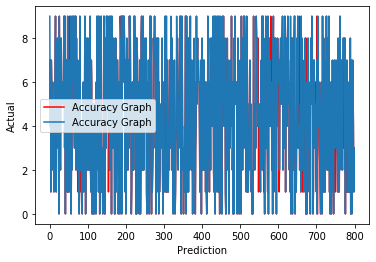

In [25]:
from matplotlib import pyplot as plt
plt.plot(rslt,'-r',test_labels[0:800],label='Accuracy Graph')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.legend()

# Performance

# Confusion matrix:

A confusion matrix is a table that is often used to describe the performance of a classification model (or “classifier”) on a set of test data for which the true values are known. It allows the visualization of the performance of an algorithm. It allows easy identification of confusion between classes e.g. one class is commonly mislabeled as the other. Most performance measures are computed from the confusion matrix.

In [27]:
cm = confusion_matrix(test_labels[0:800], rslt)
print(cm)

[[75  0  0  0  0  0  0  0  0  0]
 [ 0 76  0  0  0  0  0  0  0  0]
 [ 0  1 80  2  0  0  1  0  0  0]
 [ 0  0  0 82  0  2  0  0  0  1]
 [ 0  3  0  0 68  0  0  0  0  4]
 [ 0  2  0  2  0 60  2  0  2  0]
 [ 0  0  0  0  0  0 80  0  0  0]
 [ 0  5  0  0  1  0  0 74  0  2]
 [ 0  1  1  4  0  1  0  0 79  0]
 [ 1  0  0  0  1  2  0  5  0 80]]


# F1 score:

F1 score combines precision and recall relative to a specific positive class -The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst at 0

In [29]:
print(f1_score(test_labels[0:800], rslt,average='micro'))

0.9425
